# Generación de gráficas Laboratorio 2 - parte 2

### Algoritmo de Hammming 7-4

In [2]:
# Leer el archivo CSV generado por Java
with open('./csv/SenderHamming.csv', mode='r') as archivo_java:
    palabras_senderh = [line.strip() for line in archivo_java]

In [3]:
# Leer el archivo CSV generado por Python
with open('./csv/ReceiverHamming.csv', mode='r') as archivo_python:
    palabras_receiverh = [line.strip() for line in archivo_python]

In [4]:
# Comparar las palabras y contar cuántas no son iguales
palabras_no_igualesh = 0
for palabras_senderh, palabras_receiverh in zip(palabras_senderh, palabras_receiverh):
    if palabras_senderh != palabras_receiverh:
        palabras_no_igualesh += 1

In [5]:
print(f"Número de palabras no iguales: {palabras_no_igualesh}")


Número de palabras no iguales: 5143


### Algoritmo CRC-32

In [6]:
# Leer el archivo CSV generado por Java
with open('./csv/SenderCRC.csv', mode='r') as archivo_java:
    palabras_senderc = [line.strip() for line in archivo_java]

In [7]:
# Leer el archivo CSV generado por Python
with open('./csv/ReceiverCRC.csv', mode='r') as archivo_python:
    palabras_receiverc = [line.strip() for line in archivo_python]

In [8]:
# Comparar las palabras y contar cuántas no son iguales
palabras_no_igualesc = 0
for palabras_senderc, palabras_receiverc in zip(palabras_senderc, palabras_receiverc):
    if palabras_senderc != palabras_receiverc:
        palabras_no_igualesc += 1

In [9]:
print(f"Número de palabras no iguales: {palabras_no_igualesc}")

Número de palabras no iguales: 4436


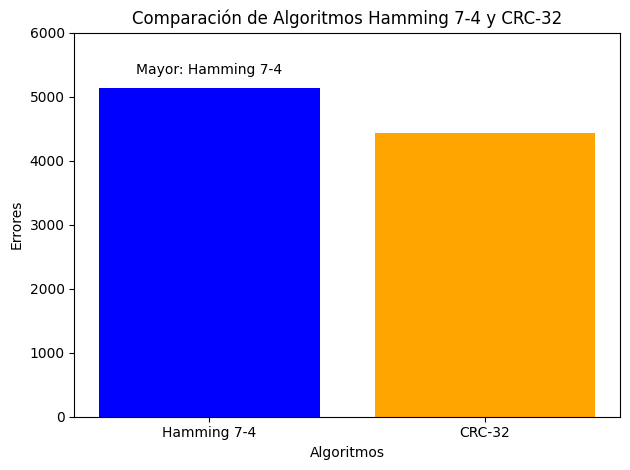

In [10]:
import matplotlib.pyplot as plt

pals = ["Hamming 7-4", "CRC-32"]
valores = [palabras_no_igualesh, palabras_no_igualesc]

plt.bar(pals, valores, color=['blue', 'orange'])
# Agregar etiquetas y título
plt.xlabel('Algoritmos')
plt.ylabel('Errores')
plt.title('Comparación de Algoritmos Hamming 7-4 y CRC-32')

# Encontrar la variable mayor
variable_mayor = pals[valores.index(max(valores))]

# Anotar el valor de la variable mayor
plt.annotate(f'Mayor: {variable_mayor}', (variable_mayor, max(valores)),
             textcoords="offset points", xytext=(0,10), ha='center')

# Ajustar la escala en el eje Y
plt.ylim(0, 6000)  # Establecer límites en Y (ajusta los valores según tus necesidades)

# Mostrar la gráfica
plt.tight_layout()  # Ajustar el diseño para evitar recortes
# Mostrar la gráfica
plt.show()

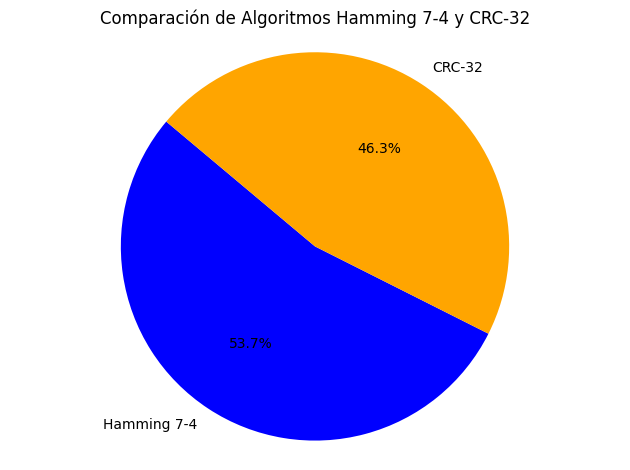

In [11]:
import matplotlib.pyplot as plt

pals = ["Hamming 7-4", "CRC-32"]
valores = [palabras_no_igualesh, palabras_no_igualesc]
colores = ['blue', 'orange']

plt.pie(valores, labels=pals, colors=colores, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Para que la gráfica de pie sea circular

# Agregar título
plt.title('Comparación de Algoritmos Hamming 7-4 y CRC-32')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


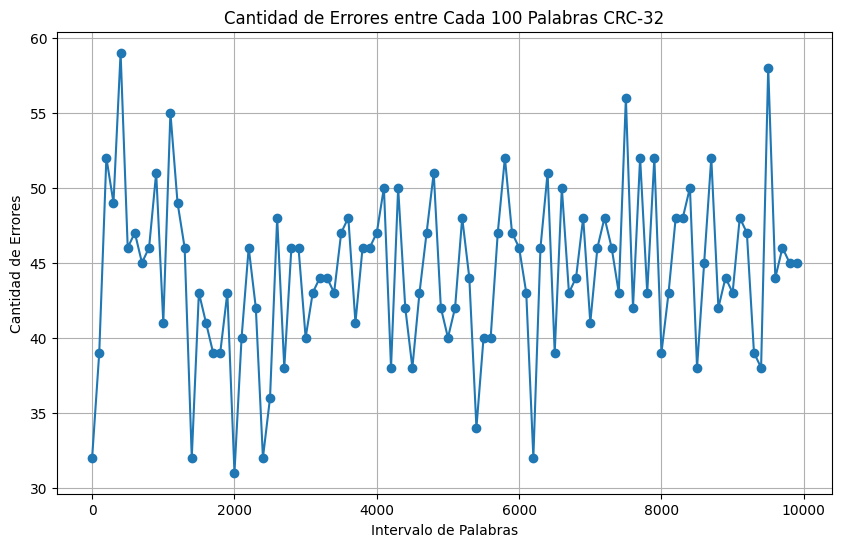

In [14]:
import matplotlib.pyplot as plt

# Leer el archivo CSV generado por Java
with open('./csv/SenderCRC.csv', mode='r') as archivo_java:
    palabras_senderc = [line.strip() for line in archivo_java]

# Leer el archivo CSV generado por Python
with open('./csv/ReceiverCRC.csv', mode='r') as archivo_python:
    palabras_receiverc = [line.strip() for line in archivo_python]

# Función para contar los errores entre dos listas
def contar_errores(lista1, lista2):
    errores = 0
    for i in range(len(lista1)):
        if lista1[i] != lista2[i]:
            errores += 1
    return errores

# Crear listas para almacenar los resultados
intervalos = []
errores_por_intervalo = []

# Dividir las listas en intervalos de 100 líneas
for i in range(0, len(palabras_senderc), 100):
    intervalo_senderc = palabras_senderc[i:i+100]
    intervalo_receiverc = palabras_receiverc[i:i+100]
    errores = contar_errores(intervalo_senderc, intervalo_receiverc)
    intervalos.append(i)
    errores_por_intervalo.append(errores)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(intervalos, errores_por_intervalo, marker='o')
plt.title('Cantidad de Errores entre Cada 100 Palabras CRC-32')
plt.xlabel('Intervalo de Palabras')
plt.ylabel('Cantidad de Errores')
plt.grid(True)
plt.show()


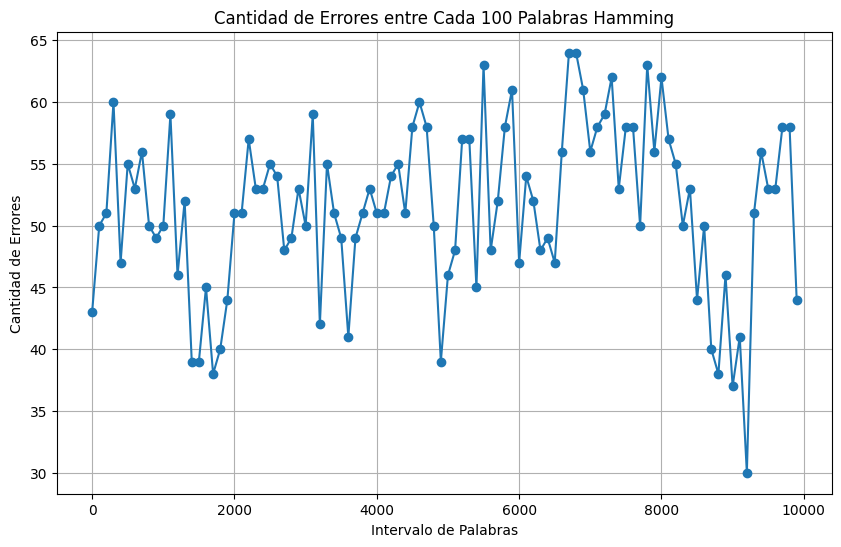

In [15]:
import matplotlib.pyplot as plt


with open('./csv/SenderHamming.csv', mode='r') as archivo_java:
    palabras_senderc = [line.strip() for line in archivo_java]

with open('./csv/ReceiverHamming.csv', mode='r') as archivo_python:
    palabras_receiverc = [line.strip() for line in archivo_python]

def contar_errores(lista1, lista2):
    errores = 0
    for i in range(len(lista1)):
        if lista1[i] != lista2[i]:
            errores += 1
    return errores

intervalos = []
errores_por_intervalo = []

for i in range(0, len(palabras_senderc), 100):
    intervalo_senderc = palabras_senderc[i:i+100]
    intervalo_receiverc = palabras_receiverc[i:i+100]
    errores = contar_errores(intervalo_senderc, intervalo_receiverc)
    intervalos.append(i)
    errores_por_intervalo.append(errores)

plt.figure(figsize=(10, 6))
plt.plot(intervalos, errores_por_intervalo, marker='o')
plt.title('Cantidad de Errores entre Cada 100 Palabras Hamming')
plt.xlabel('Intervalo de Palabras')
plt.ylabel('Cantidad de Errores')
plt.grid(True)
plt.show()